In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal
from utils import audio, channels

cwd = os.getcwd()

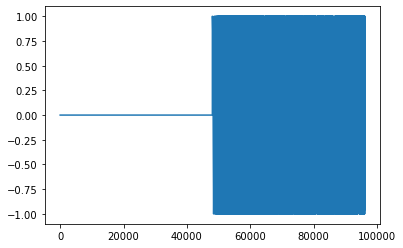

In [5]:
silence_duration = 1
chirp_duration = 1
fs = 48000
double_chirp = False

# Generate a chirp signal with delay
sample_times = np.linspace(0, chirp_duration, fs * chirp_duration)
chirp = scipy.signal.chirp(sample_times, 20, chirp_duration, 10000)
silence = np.zeros(fs * silence_duration)

if double_chirp:
    delayed_chirp = np.append(silence, np.tile(chirp, 2))
    filename = "double_chirp"
else:
    delayed_chirp = np.append(silence, chirp)
    filename = "single_chirp"

audio.signal_to_wav(delayed_chirp, fs, filename, os.path.join(cwd, "audio_files"))

plt.plot(delayed_chirp)
plt.show(block=False)

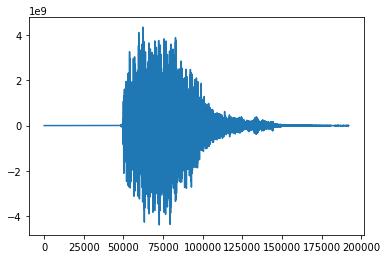

In [6]:
# Send the delayed chirp through octagon channel
octagon = channels.octagon(os.path.join(cwd, "audio_files"), fs)
chirp_through_octagon = channels.channel_output(octagon, delayed_chirp, noise=True, sigma=0.1)

audio.signal_to_wav(chirp_through_octagon, fs, filename+"_octagon", os.path.join(cwd, "audio_files"))

plt.plot(chirp_through_octagon)
plt.show(block=False)